In [10]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [11]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

train_df=pd.read_csv("train.csv")

le = preprocessing.LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df.Sex.values)

#correlation between ‘survived’ and ‘sex’ column
print(train_df['Survived'].corr(train_df['Sex']))

-0.5433513806577552


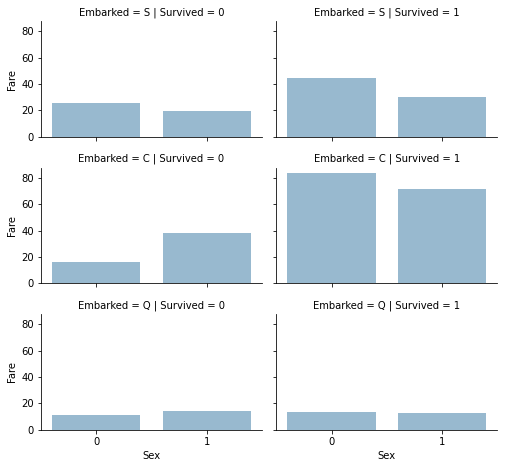

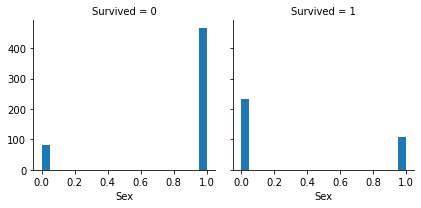

In [12]:
#visualization1 to describe correlations.
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

##visualization2 to describe correlations.
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Sex', bins=20)

In [13]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

# Join data to analyse and process the set as one.
train_raw['train'] = 1
test_raw['train'] = 0
df = train_raw.append(test_raw, sort=False)

features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

df = df[features + [target] + ['train']]
# Categorical values need to be transformed into numeric.
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
train = df.query('train == 1')
test = df.query('train == 0')
# Drop missing values from the train set.
train.dropna(axis=0, inplace=True)
labels = train[target].values


train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

%matplotlib inline
# Suppress warnings
warnings.filterwarnings("ignore")
classifier = GaussianNB()

classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80        85
         1.0       0.70      0.69      0.70        58

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.75       143
weighted avg       0.75      0.76      0.75       143

[[68 17]
 [18 40]]
accuracy is 0.7552447552447552


In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings # current version generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

glass = pd.read_csv("Glass.csv")

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X = glass.iloc[:, :-1].values
y = glass.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.39      0.86      0.54        21
           2       0.50      0.12      0.19        26
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       0.88      1.00      0.93         7

    accuracy                           0.46        65
   macro avg       0.41      0.50      0.41        65
weighted avg       0.44      0.46      0.37        65

[[18  1  0  0  1  1]
 [21  3  1  1  0  0]
 [ 7  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]
accuracy is 0.46153846153846156


In [17]:
from sklearn.model_selection import cross_val_score
nb =  GaussianNB()
scores = cross_val_score(nb, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.53333333 0.2        0.66666667 0.46666667 0.73333333 0.53333333
 0.46666667 0.33333333 0.4        0.42857143]
Mean: 0.47619047619047616
Standard Deviation: 0.14624553019508257


In [18]:
from sklearn.svm import SVC, LinearSVC

classifier = LinearSVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           1       0.67      0.10      0.17        21
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.11      1.00      0.20         7

    accuracy                           0.14        65
   macro avg       0.13      0.18      0.06        65
weighted avg       0.23      0.14      0.08        65

[[ 2  0  0  0  0 19]
 [ 0  0  0  0  0 26]
 [ 1  0  0  0  0  6]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  0  7]]
accuracy is 0.13846153846153847


In [19]:
from sklearn.model_selection import cross_val_score
nb =  LinearSVC()
scores = cross_val_score(nb, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.53333333 0.46666667 0.46666667 0.4        0.53333333 0.26666667
 0.53333333 0.4        0.4        0.57142857]
Mean: 0.45714285714285713
Standard Deviation: 0.08759834123860508


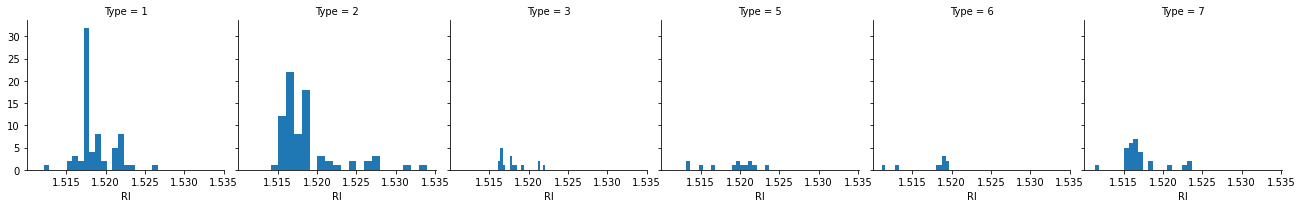

In [16]:
#visualization
g = sns.FacetGrid(glass, col='Type')
g.map(plt.hist, 'RI', bins=20)

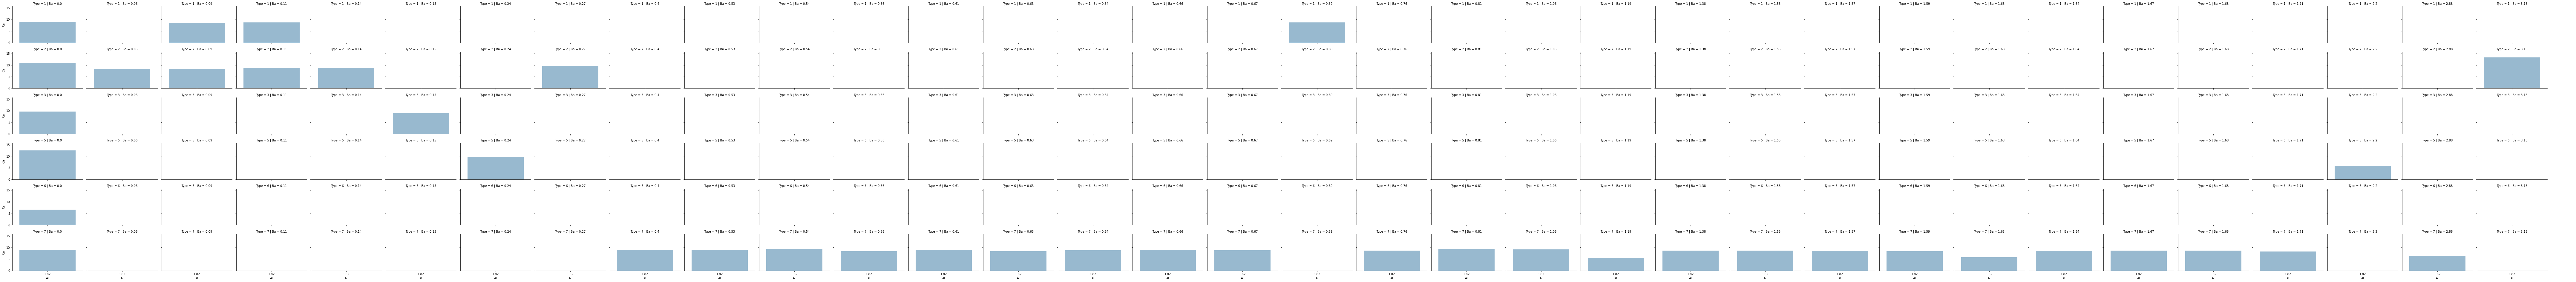

In [9]:
#visualization
grid = sns.FacetGrid(glass, row='Type', col='Ba', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Al', 'Ca', alpha=.5, ci=None)
grid.add_legend()